In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
import os
os.chdir("/content/gdrive/My Drive/cs747/CS747_Assignment3")
%ls
!pip3 install torch torchvision
import torch
a = torch.Tensor([1]).cuda()
print(a)

Mounted at /content/gdrive
celeba_data/         MP3_P1.ipynb
download_celeba.sh   q4pf89jtkvjndi4f8ip7wofuulhhphjj.zip
gan/                 Spring_2023_CS_747_Deep_Learning_Assignment-3.pdf
GAN_debugging.ipynb  Untitled0.ipynb
gan_samples/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tensor([1.], device='cuda:0')


# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [9]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from gan.train import train
from gan.utils import sample_noise, show_images, deprocess_img, preprocess_img
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


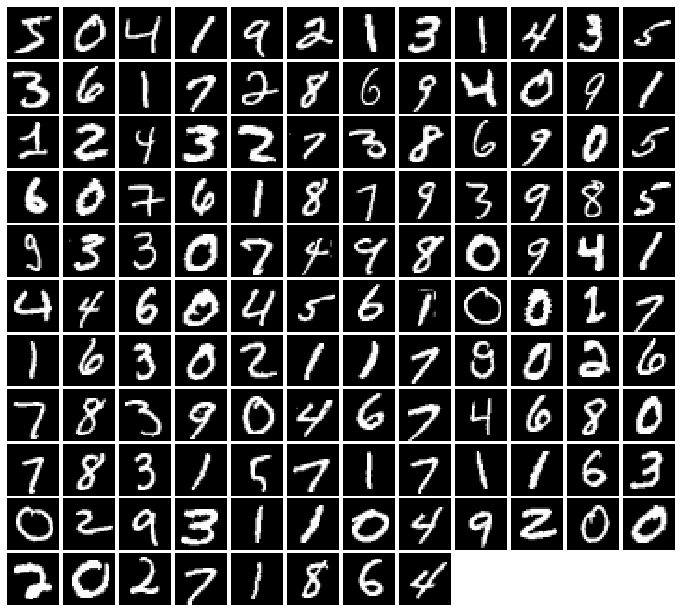

In [12]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)


imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

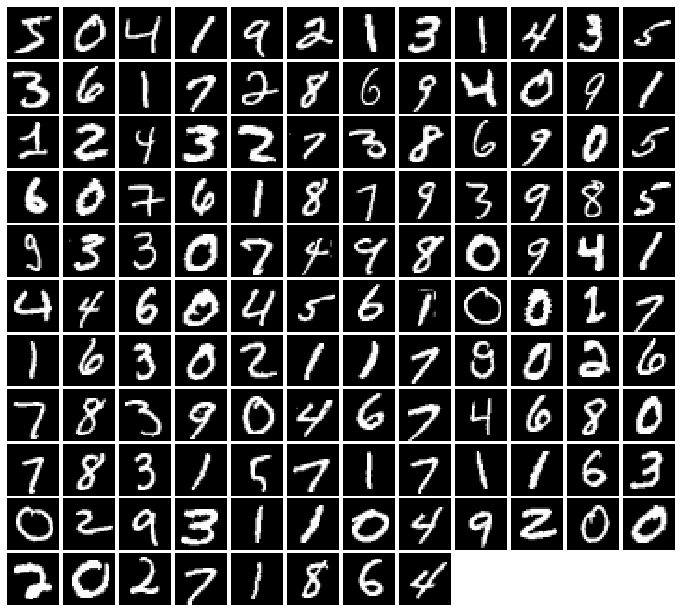

In [13]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)

imgs = next(iter(loader_train))[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

# Discriminator and Generator


In [14]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [15]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [16]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="files/gan_samples/mnist.jpg" width=500>

EPOCH:  1
Iter: 0, D: 0.7185, G:0.7058


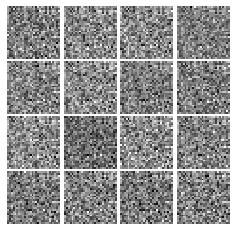


Iter: 250, D: 0.6823, G:0.6718


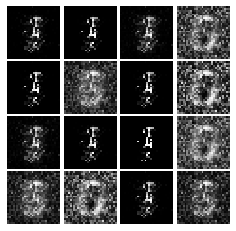


EPOCH:  2
Iter: 500, D: 0.5097, G:1.322


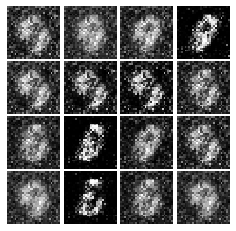


Iter: 750, D: 0.5902, G:1.699


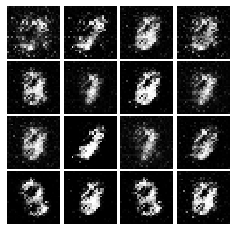


EPOCH:  3
Iter: 1000, D: 0.4942, G:1.372


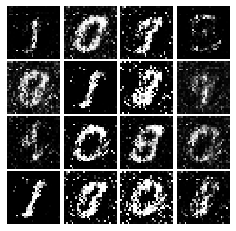


Iter: 1250, D: 0.5703, G:1.188


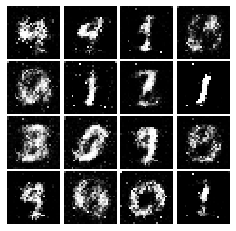


EPOCH:  4
Iter: 1500, D: 0.5926, G:0.9574


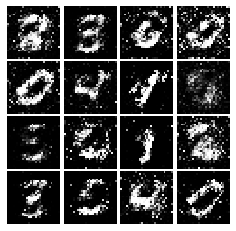


Iter: 1750, D: 0.6139, G:0.9482


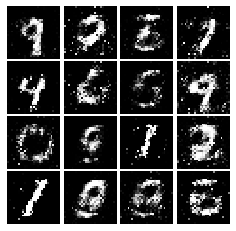


EPOCH:  5
Iter: 2000, D: 0.6902, G:1.499


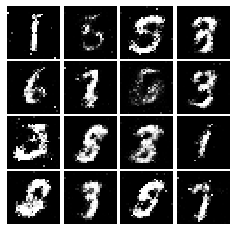


Iter: 2250, D: 0.6299, G:0.8343


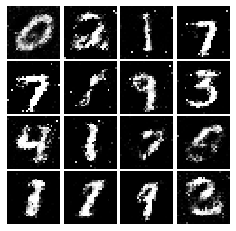


EPOCH:  6
Iter: 2500, D: 0.6854, G:0.8338


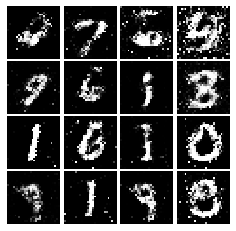


Iter: 2750, D: 0.6497, G:1.035


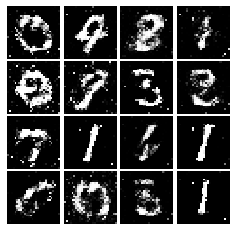


EPOCH:  7
Iter: 3000, D: 0.6108, G:0.8437


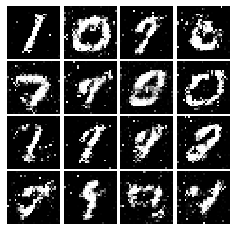


Iter: 3250, D: 0.6075, G:1.025


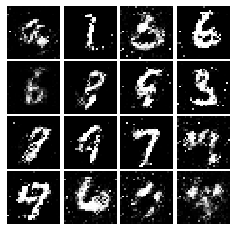


EPOCH:  8
Iter: 3500, D: 0.6309, G:0.8954


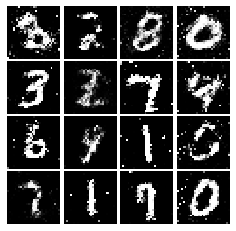


EPOCH:  9
Iter: 3750, D: 0.6235, G:1.02


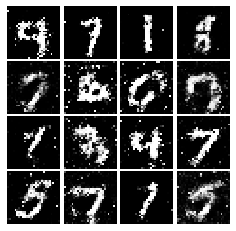


Iter: 4000, D: 0.6568, G:0.8247


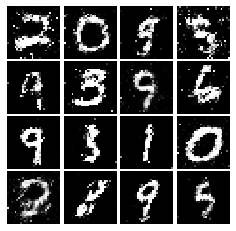


EPOCH:  10
Iter: 4250, D: 0.7152, G:0.8327


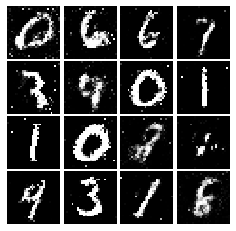


Iter: 4500, D: 0.6273, G:0.8903


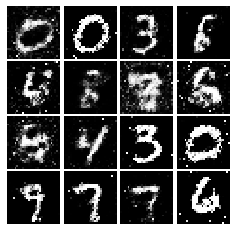

In [17]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: 0.2788, G:0.5229


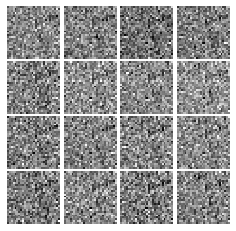


Iter: 250, D: 0.1057, G:0.3204


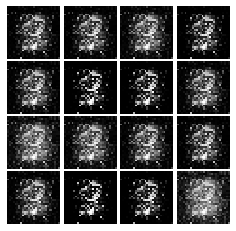


EPOCH:  2
Iter: 500, D: 0.03851, G:0.368


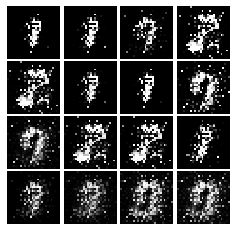


Iter: 750, D: 0.03355, G:0.441


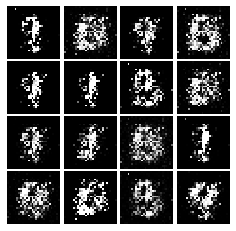


EPOCH:  3
Iter: 1000, D: 0.08127, G:0.2223


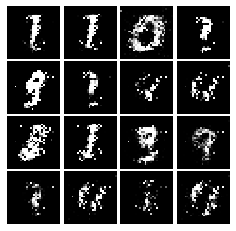


Iter: 1250, D: 0.05803, G:0.2941


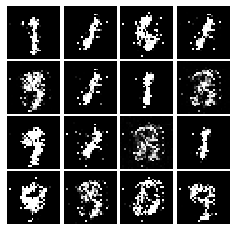


EPOCH:  4
Iter: 1500, D: 0.1001, G:0.3843


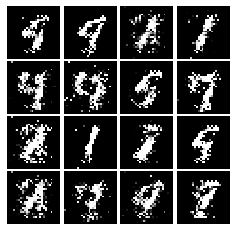


Iter: 1750, D: 0.08823, G:0.2518


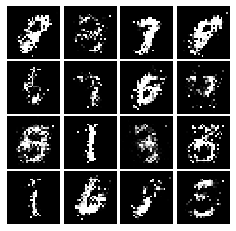


EPOCH:  5
Iter: 2000, D: 0.1101, G:0.1874


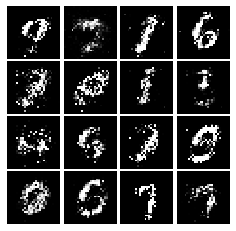


Iter: 2250, D: 0.11, G:0.1913


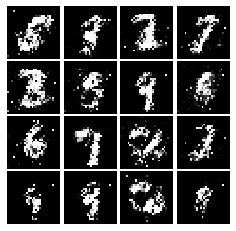


EPOCH:  6
Iter: 2500, D: 0.1119, G:0.1535


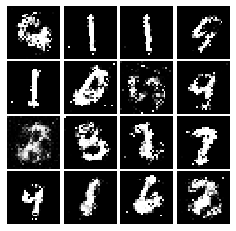


Iter: 2750, D: 0.1195, G:0.1778


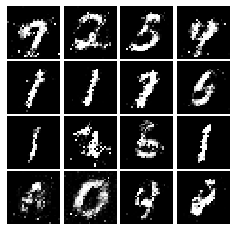


EPOCH:  7
Iter: 3000, D: 0.1139, G:0.1677


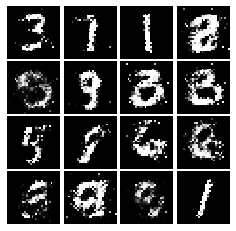


Iter: 3250, D: 0.1024, G:0.2315


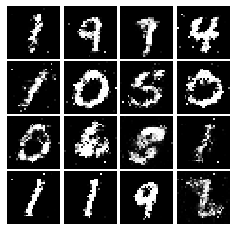


EPOCH:  8
Iter: 3500, D: 0.1153, G:0.1679


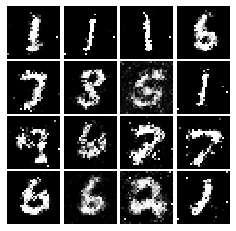


EPOCH:  9
Iter: 3750, D: 0.1038, G:0.1724


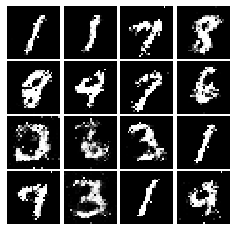


Iter: 4000, D: 0.1199, G:0.1691


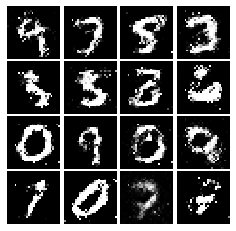


EPOCH:  10
Iter: 4250, D: 0.1121, G:0.1688


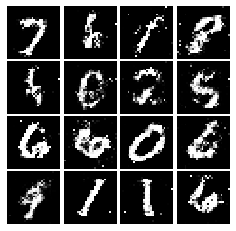


Iter: 4500, D: 0.1119, G:0.1842


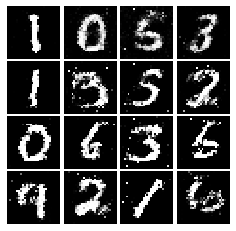

In [18]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)